(ifu-spatial-masking-doc)=
# IFS Cube spatial masking

In this tutorial, we shall generate the spatial masks for for the Integraded Field Spectroscopy (IFS) observation of the emission line galaxy [SHOC579](https://dr17.sdss.org/marvin/galaxy/8626-12704/). We shall download the cube from the [MANGA survey](https://www.sdss4.org/surveys/manga/).

<img src="https://data.sdss.org/sas/dr17/manga/spectro/redux/v3_1_1/8626/images/12704.png" alt="SHOC579 MANGA field" title="SHOC579"/>

There are two important reasons to prepare these masks in advance:

* Exclude regions with noise/artifacts and focus the analysis on the physical phenomena
* Adjust the  line analysis to different ionization and kinematic conditions.

## Creating a $\tt{lime.Cube}$

Let's start by downloading the data

In [1]:
from urllib import request
from pathlib import Path
import lime

# MANGA cube web link
cube_url = 'https://data.sdss.org/sas/dr17/manga/spectro/redux/v3_1_1/8626/stack/manga-8626-12704-LOGCUBE.fits.gz'

# Data location
cube_address = Path('../0_resources/spectra/manga-8626-12704-LOGCUBE.fits.gz')
cfgFile = '../0_resources/ifu_manga.toml'

# Download the cube file if necessary (this may take some time)
if not cube_address.is_file():
    request.urlretrieve(cube_url, cube_address)
    print(' Download completed!')
else:
    print('Observation found in folder')

/home/vital/anaconda3/envs/lime2/lib/python3.12/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.6.1 when using version 1.7.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/vital/anaconda3/envs/lime2/lib/python3.12/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.6.1 when using version 1.7.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


 Download completed!


Now, we create a [$\tt{lime.Cube}$ observation](../1_introduction/1_observations.ipynb) from this file:

In [2]:
# Load the configuration file:
obs_cfg = lime.load_cfg(cfgFile)

# Define a LiMe cube object
z_obj = obs_cfg['SHOC579']['redshift']
shoc579 = lime.Cube.from_file(cube_address, instrument='manga', redshift=z_obj)

a string value was expected. [astropy.wcs.wcs]


In order to plot a spectral band of the cube. You can use the $\tt{lime.Cube.plot.cube}$ function:

/home/vital/anaconda3/envs/lime2/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4859: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/home/vital/anaconda3/envs/lime2/lib/python3.12/site-packages/astropy/visualization/wcsaxes/core.py:248: UserWarning: Log scale: values of z <= 0 have been masked
  cset = super().contour(*args, **kwargs)
/home/vital/anaconda3/envs/lime2/lib/python3.12/site-packages/astropy/visualization/wcsaxes/core.py:248: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = super().contour(*args, **kwargs)


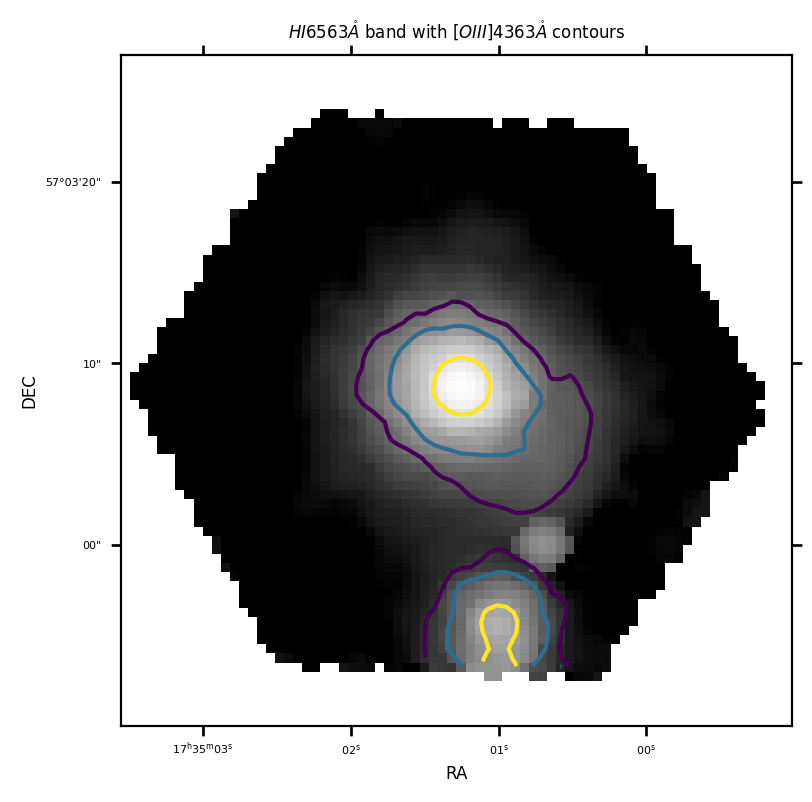

In [19]:
# Plot an observational band
shoc579.plot.cube(line_bg='H1_6563A', line_fg='O3_4363A', min_pctl_bg=70, cont_pctls_fg=[90, 95, 99])


The first argument, ``line_bg=H1_6563A`` decides the band for the grey background, where the minimum flux percentile is defined by the  ``min_pctl_bg=70`` argument.

The second argument ``line_fg=O3_4363A`` gives the option to plot flux contours where the percentiles are defined by the ``cont_pctls_fg=[80, 90, 95, 99]`` argument.

<div class="alert alert-warning">

**Please note:** Depending on the scale of the flux, the percentiles may have a large spatial variability, remember to play with the ``min_pctl_bg`` and ``cont_pctls_fg`` arguments, as well as the ``.unit_conversion`` function to find the optimum solution for you.

</div>


In order to check individual spaxel spectra you can use the [$\tt{lime.Cube.check.cube}$](../3_explanations/0_measurements.rst) function:


/home/vital/anaconda3/envs/lime2/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4859: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/home/vital/anaconda3/envs/lime2/lib/python3.12/site-packages/astropy/visualization/wcsaxes/core.py:248: UserWarning: Log scale: values of z <= 0 have been masked
  cset = super().contour(*args, **kwargs)
/home/vital/anaconda3/envs/lime2/lib/python3.12/site-packages/astropy/visualization/wcsaxes/core.py:248: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = super().contour(*args, **kwargs)


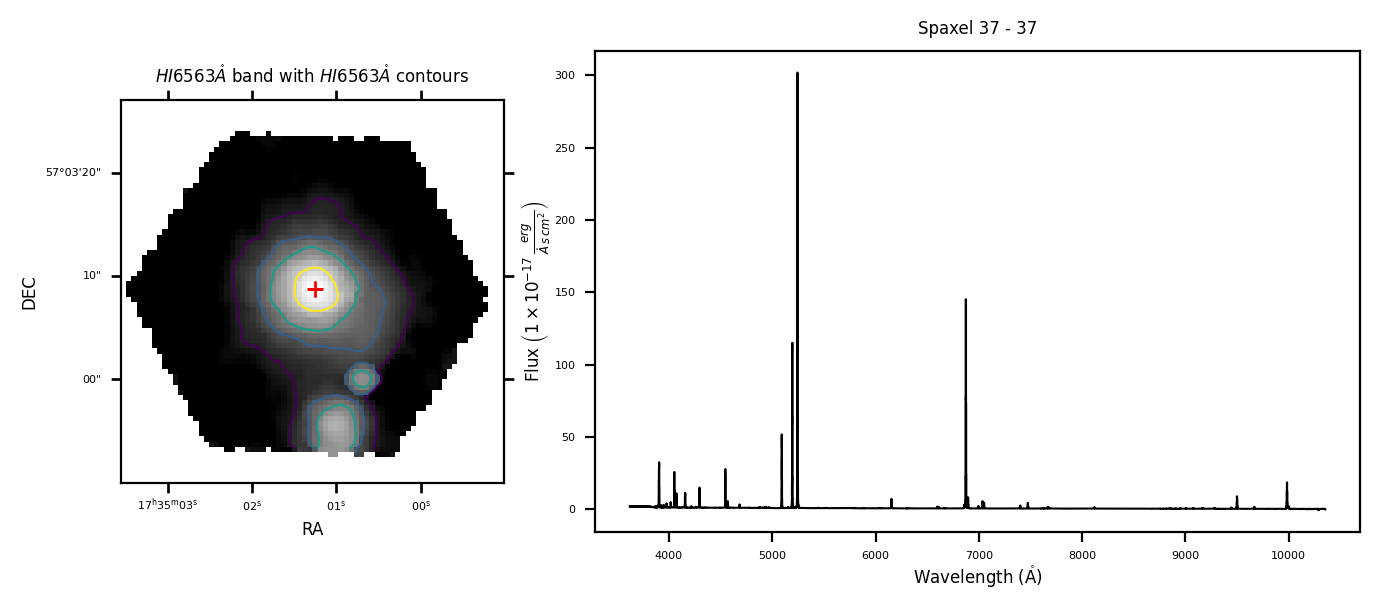

In [20]:
# Check the spaxels interactively
shoc579.check.cube('H1_6563A', line_fg='H1_6563A', min_pctl_bg=70, cont_pctls_fg=[80, 90, 95, 99])

A left click on the spatial map will change the spaxel displayed on the right hand side spectrum.

## Spatial masking options

The [$\tt{lime.spatial\_masking}$](../3_explanations/0_measurements.rst) can save the spatial masks into *.fits* file as binary arrays. The argument ``param`` provides the type of parameter to compute it. By default ``param='flux'``, compute the band flux as in the case above for the $\tt{lime.Cube.plot.cube}$ and $\tt{lime.Cube.check.cube}$.

However, you can use the continuum signal-to-noise ``param='SN_cont'``

/home/vital/PycharmProjects/lime/src/lime/observations.py:931: RuntimeWarning: invalid value encountered in divide
  param_image = np.nanmean(signal_slice, axis=0) / np.nanstd(signal_slice, axis=0)
/home/vital/anaconda3/envs/lime2/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4859: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


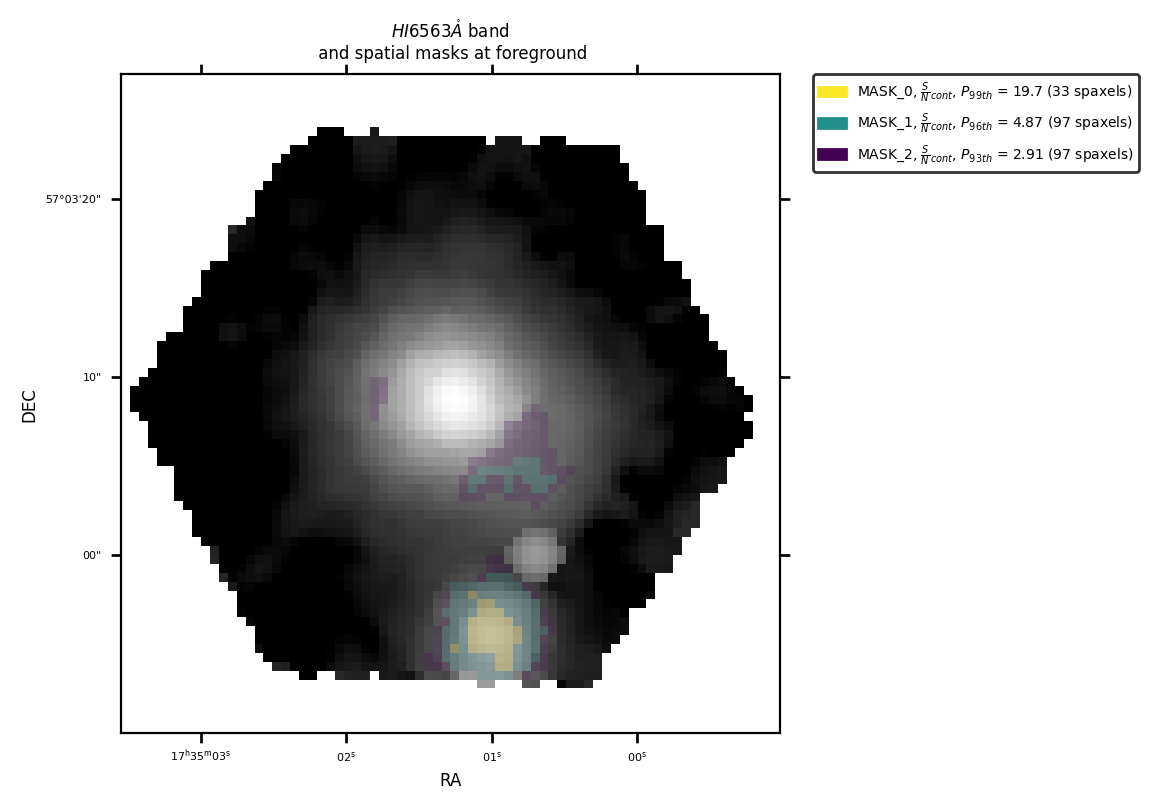

In [21]:
# Line continuum mask
spatial_mask_SN_cont = '../0_resources/results/SHOC579_mask_SN_cont.fits'
shoc579.spatial_masking('O3_4363A', param='SN_cont', contour_pctls=[93, 96, 99], fname=spatial_mask_SN_cont)
shoc579.plot.cube('H1_6563A', masks_file=spatial_mask_SN_cont)


or the emission line signal-to-noise ``param='SN_cont'``

/home/vital/PycharmProjects/lime/src/lime/observations.py:941: RuntimeWarning: invalid value encountered in divide
  param_image = (np.sqrt(2 * n_pixels * np.pi) / 6) * (Amp_image / std_image)
/home/vital/anaconda3/envs/lime2/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4859: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


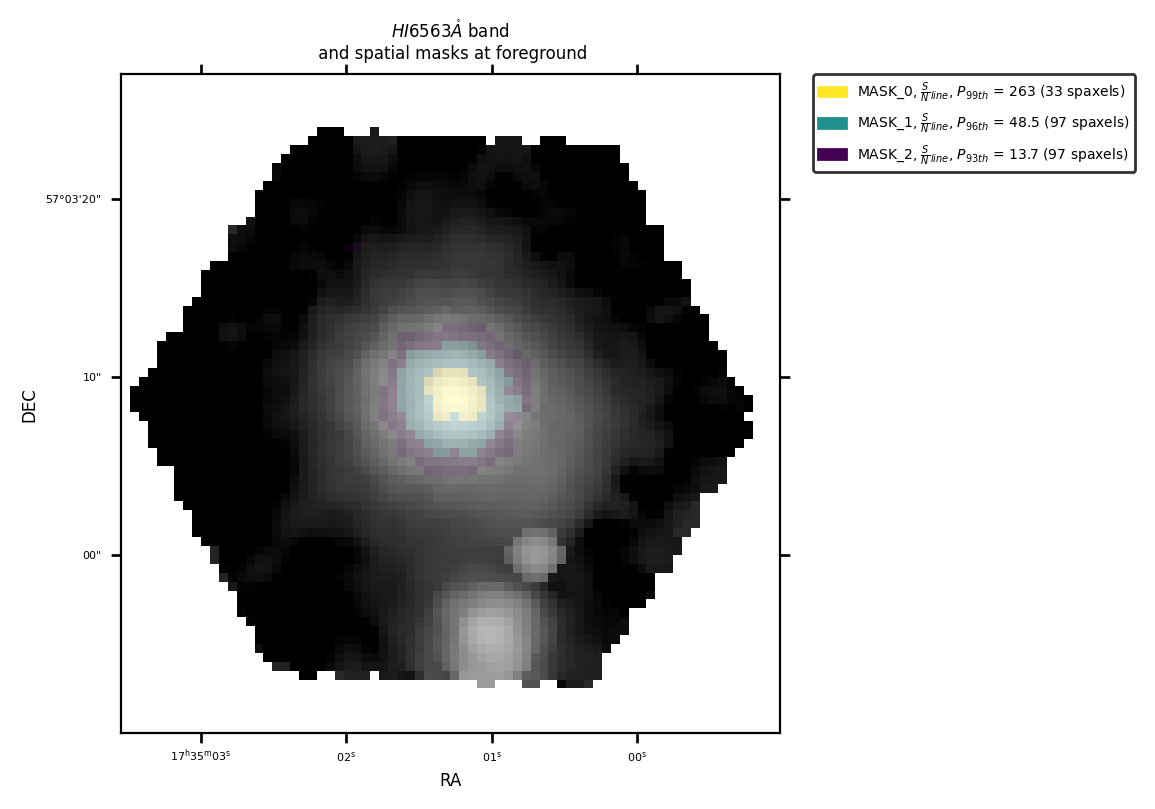

In [22]:
# Line emission mask
spatial_mask_SN_line = '../0_resources/results/SHOC579_mask_SN_line.fits'
shoc579.spatial_masking('O3_4363A', param='SN_line', contour_pctls=[93, 96, 99], fname=spatial_mask_SN_line)
shoc579.plot.cube('H1_6563A', masks_file=spatial_mask_SN_line)

Finally, you can use the ``mask_file`` argument in the [$\tt{lime.Cube.check.cube}$](../3_explanations/0_measurements.rst) function to add/remove spaxels manually from the mask:

/home/vital/anaconda3/envs/lime2/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4859: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


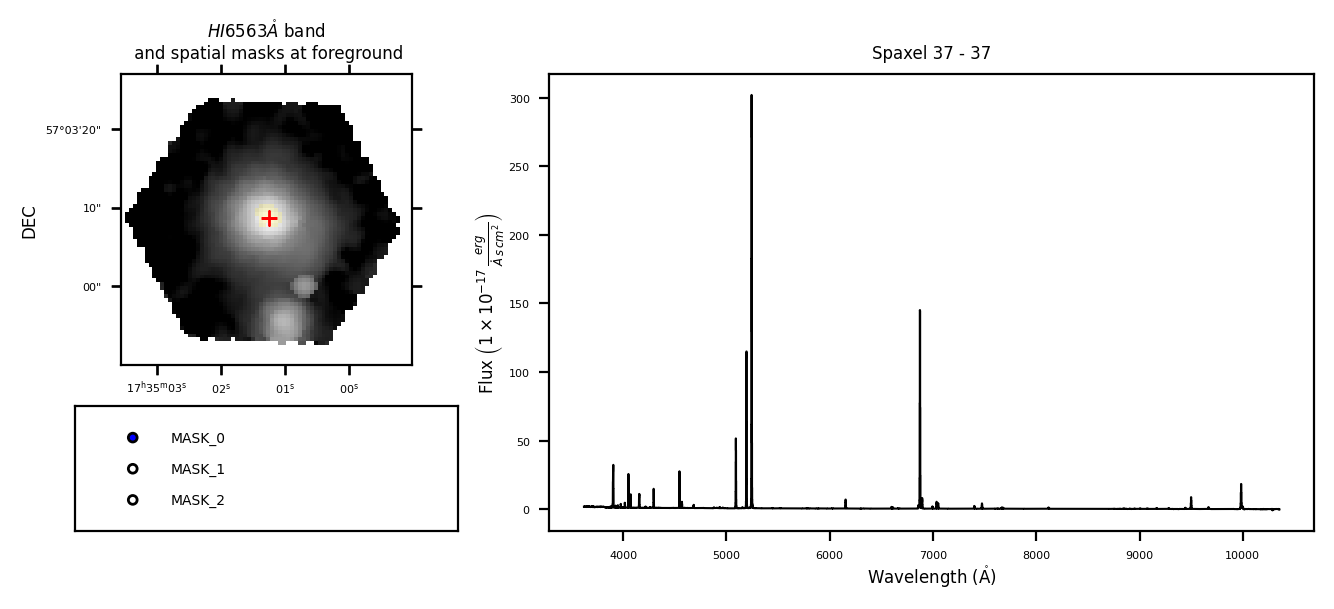

In [24]:
# Manually add/remove spaxels to the spatial mask
shoc579.check.cube('H1_6563A', masks_file=spatial_mask_SN_line)

A right-click on a spaxel will add it to the currently active mask if it is not already part of it, or remove it otherwise.

## Takeaways
* In the analysis of IFS cubes, it is essential to generate spatial masks to avoid bad spaxels and adjust the line analysis to different phenomena. 
* Once you create a [$\tt{lime.Cube}$](../3_explanations/0_measurements.rst) observation, the [$\tt{lime.Cube.spatial\_masking}$](../3_explanations/0_measurements.rst) function can generate a *.fits* file with the masks as binary array based on several parameters.
* The [$\tt{lime.Cube.plot.cube}$](../3_explanations/0_measurements.rst) can plot these masks, while the [$\tt{lime.Cube.check.cube}$](../3_explanations/0_measurements.rst) function can be used to add/remove spaxels manually from these masks.
* You can read the function documentation in the [API](https://lime-stable.readthedocs.io/en/latest/reference/API.html).